In [1]:
"""
Author: Md Juber Rahman
Course: Pattern Recognition
Software Assignment 2
Problem- 3
Intro: I have used The Olivetti faces dataset avaiable from Scikit learn http://scikit-learn.org/0.19/datasets/olivetti_faces.html
There are ten different 64x64 images of each of 40 distinct subjects
an integer from 0 to 39 indicating the identity of the person pictured
"""

'\nAuthor: Md Juber Rahman\nCourse: Pattern Recognition\nSoftware Assignment 2\nProblem- 3\n'

In [37]:
# import the dataset
from sklearn import datasets
import numpy as np
faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)

(400, 4096)
400
4096


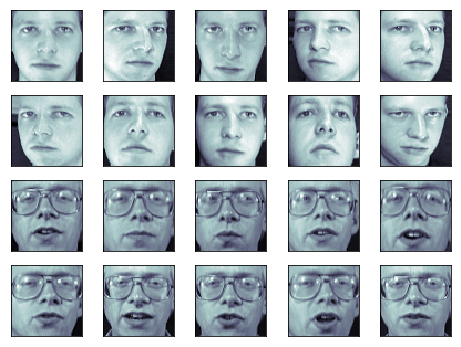

In [16]:
# visualize some faces 
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))

for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [63]:
# split the data in training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train)

(300, 4096) (100, 4096)
[25  6 31 15 28 34  8 34 15 29  9  8 29  2 36 21 25  4 23 34  9 22 23 23
 37 14  2 25 35 16 15 39  6 24 21 10 31 19 32  1 16 18  3 11 26 10 35 24
 23 11 33 12 28 11 21 13 27 12 19 29 28 13  3 37 16  3 23  9  8  6 16 28
 20 39 23 28 10  4 32 39 22  7 13 38 22 21  2 18 36 27  5 32 35  2  0 21
 15 21 37 22 13 23 21 27 27 30 23  3 20 39  6  2 33  4 24 12  9 11 16 38
 38 34  4  1 28  7 24 39  7  1 36 21 38 38 22 16 10 16  8 18 39 11 25 18
 20 37 11 14 15 15  1 26  7 10 32 20 31 13 23 31 24 30  1 22 30  0 27 12
  7 18 30 37 34 18 35  8 25  1 29  8 26  3 38  5  4 27  5 20 31 31 33 12
 22  6 30 13 18  2  4  0 20 33  9 38 17 25  9 36  9 35 16  6 30  4 20 27
 22 14 14 18 13 35 39 26 32 20  8 12 34 36  9  8 26 11 29  5 32 25 35  4
 10 36 27 35  3  5 34 12 29  2 18 16 15 24 20  3  3 12 18 37 28 36 14 28
 37 17  9 33 33 19 24 11 26  7 33  2 16 33 38 17 38  3 19 31  8  7  8 29
 24 27 21  0 35 19 25 32 19 11  4 17]


In [6]:
# do PCA decomposition
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

(150, 4096)


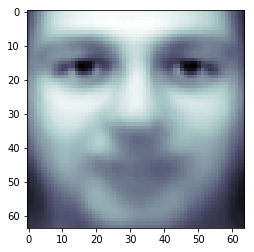

In [8]:
# show the average face
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)
print(pca.components_.shape)

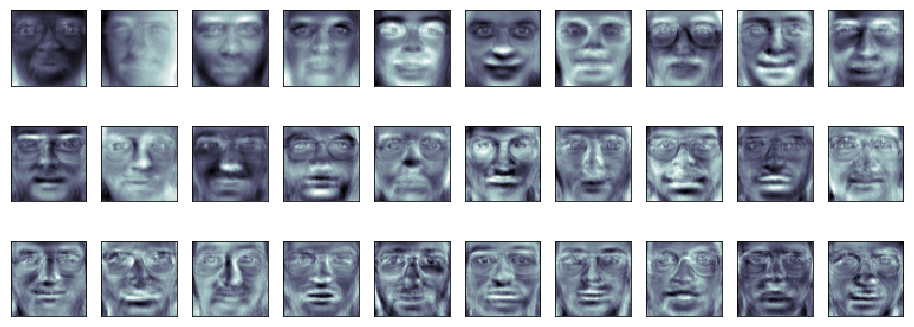

In [9]:
# visulalize the principal components
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)


In [17]:
# project the training and test dataset
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 150)
(100, 150)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

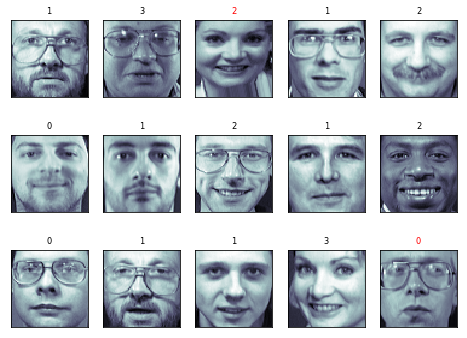

In [31]:
# evaluate the classification model
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)


In [32]:
# performance with PCA only
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test_pca)
#print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 3]]


0.77

In [39]:
# Classification with LDA only
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf2 = LinearDiscriminantAnalysis()
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy_score(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.98

In [38]:
# Classification with PCA+LDA 
clf2.fit(X_train_pca, y_train)
y_pred = clf2.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.97

In [40]:
"""
Explanation
LDA is better compared to PCA
Only LDA may suffer from multicollinearity
It is advisaible to do PCA+LDA
"""

'\nExplanation\nLDA is better compared to PCA\nOnly LDA may suffer from multicollinearity\nIt is advisaible to do PCA+LDA\n'

In [51]:
# add random noise to data
! pip install scikit-image
import random
from scipy import ndarray
import skimage as sk
from skimage import io
import os
from skimage import transform
from skimage import util
def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

num_generated_files = 0
transformed_image = None

while num_generated_files <= 399:
    transformed_image = random_noise(faces.images[num_generated_files])
    num_generated_files += 1
    folder_path = 'C:/Users/mrahman8/Desktop/Fall2018/Pattern Reco/noisyimages'
    new_file_path = '%s/augmented_image_%s.png' % (folder_path, num_generated_files)
    # write image to the disk
    io.imsave(new_file_path, transformed_image)

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [ ]:
#Add  noise
# import the dataset
from sklearn import datasets
import numpy as np
faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
# add gaussian noise
mean = 0.0
var = 0.01
sigma = var**0.5
gauss = np.array(faces.data.shape)
gauss = np.random.normal(mean,sigma,(row,col))
gauss = gauss.reshape(row,col)
noisyfaces = faces.data + gauss
print(noisyfaces.data.shape)
folder_path = 'C:/Users/mrahman8/Desktop/Fall2018/Pattern Reco/noisyImg'
new_file_path = '%s/augmented_image_%s.png' % (folder_path, num_generated_files)

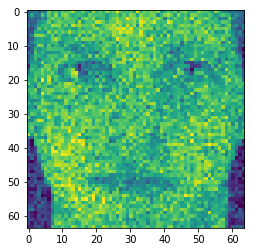

In [6]:
# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
    
# Read a noisy image 
noisyImg=mpimg.imread('C:/Users/mrahman8/Desktop/Fall2018/Pattern Reco/noisyimages/augmented_image_1.png') 
# show the image
plt.imshow(noisyImg) 

In [45]:
# import the dataset
from sklearn import datasets
import numpy as np
faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
# add gaussian noise
mean = 0.0
var = 0.01
sigma = var**0.5
gauss = np.array(faces.data.shape)
gauss = np.random.normal(mean,sigma,(row,col))
gauss = gauss.reshape(row,col)
noisyfaces = faces.data + gauss
print(noisyfaces.data.shape)

(400, 4096)
(400, 4096)


In [48]:
# split the data in training and test set
from sklearn.model_selection import train_test_split
training, test = noisyfaces[:300,:], noisyfaces[300:,:]
print(training.shape, test.shape)


(300, 4096) (100, 4096)


In [51]:
# do PCA decomposition
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(training)
# project the training and test dataset
train_pca = pca.transform(training)
test_pca = pca.transform(test)
print(train_pca.shape)
print(test_pca.shape)

(300, 150)
(100, 150)


In [54]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(train_pca, y_train)
# performance with PCA only
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_predN = clf.predict(test_pca)
#print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_predN))
accuracy_score(y_test, y_predN)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.05

In [56]:
# Classification with LDA only
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf2 = LinearDiscriminantAnalysis()
clf2.fit(training, y_train)
y_predLdaN = clf2.predict(test)
accuracy_score(y_test, y_predLdaN)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.01

In [68]:
# Classification with PCA+LDA 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf3=QuadraticDiscriminantAnalysis()
clf3.fit(train_pca, y_train)
y_pred3 = clf3.predict(test_pca)
accuracy_score(y_test, y_pred3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.05

In [ ]:
#Neither LDA nor PCA works for noisy dataset